# Mortgage Underwriting AI Assistant: Data Analysis

### Table of Contents

1. [Notebook setup](#Notebook-setup)
2. [ETL](#ETL)<br>
    2.1. [Year](#Year)<br>
    2.2. [Loan Limit](#Loan-limit)<br>
    2.3. [PreApproval](#PreApproval)<br>
    2.4. [Loan type](#Loan-type)<br>
    2.5. [Loan purpose](#Loan-purpose)<br>
    2.6. [Credit worthiness](#Credit-worthiness)<br>
    2.7. [Line of Credit](#Line-of-Credit)<br>
    2.8. [Commercial loan](#Commercial-loan)<br>
    2.9. [Loan amount](#Loan-amount)<br>
    2.10. [Interest rate](#Interest-rate)<br>
    2.11. [Interest rate spread](#Interest-rate-spread)<br>
    2.12. [Upfront charges](#Upfront-charges)<br>
    2.13. [Term](#Term)<br>
    2.14. [Negative ammortization](#Negative-ammortization)<br>
    2.15. [Interest only](#Interest-only)<br>
    2.16. [Lump sum payment](#Lump-sum-payment)<br>
    2.17. [Property value](#Property-value)<br>
    2.18. [Construction type](#Construction-type)<br>
    2.19. [Occupancy type](#Occupancy-type)<br>
    2.20. [Property type](#Property-type)<br>
    2.21. [Units](#Units)<br>
    2.22. [Income](#Income)<br>
    2.23. [Credit type](#Credit-type)<br>
    2.24. [CoBorrower credit type](#CoBorrower-credit-type)<br>
    2.25. [Age](#Age)<br>
    2.26. [Application taken](#Application-taken)<br>
    2.27. [LTV](#LTV)<br>
    2.28. [Deposit type](#Deposit-type)<br>
    2.29. [Status](#Status)<br>
3. [Fair Credit](#Fair-credit)<br>
4. [Build Model](#Model)<br>
5. [Improve Model](#Improve-model)<br>
6. [Evaluate Model](#Evaluate-model)<br>

### Notebook setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import classification_report

%matplotlib inline

In [ ]:
dataset = pd.read_csv('data.csv')

In [ ]:
dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Clean up column names

In [ ]:
dataset.columns= dataset.columns.str.lower()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

### ETL

There are 34 features in the dataset. Analyze each feature setting the correct datatype, imputing missing values as needed and dropping features as needed

#### ID

ID can be dropped...status will be the independent feature

In [ ]:
dataset.drop('id', inplace=True, axis=1)

In [ ]:
dataset.head()

,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


#### Year

In [ ]:
dataset['year'].unique()

array([2019])

All values in the year column are for 2019. This column can be dropped.

In [ ]:
dataset.drop('year', inplace=True, axis=1)

In [ ]:
dataset.head()

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


#### Loan limit

In [ ]:
dataset['loan_limit'].unique()

array(['cf', nan, 'ncf'], dtype=object)

There are some NaN values in this vector that will need to be cleaned up.

In [ ]:
# Get a count of the number of applications missing the loan limits
dataset[dataset['loan_limit'].isnull()].shape[0]

3344

3344 applications are missing a loan limit designation

In [ ]:
dataset['loan_limit'].fillna(0, inplace=True)

In [ ]:
dataset['loan_limit'].unique()

array(['cf', 0, 'ncf'], dtype=object)

Encode conforming and non-conforming limits to 1 and 2

In [ ]:
dataset['loan_limit'].replace({'cf': 1, 'ncf': 2}, inplace=True)

In [ ]:
dataset['loan_limit'].unique()

array([1, 0, 2])

#### PreApproval

Rename approv_in_adv to pre_approval

In [ ]:
dataset.rename(columns={"approv_in_adv": "pre_approval"}, inplace=True)

In [ ]:
dataset['pre_approval'].unique()

array(['nopre', 'pre', nan], dtype=object)

Encode nopre and nan to 0, pre to 1

In [ ]:
dataset['pre_approval'].fillna(0, inplace=True)

In [ ]:
dataset['pre_approval'].replace({'nopre': 0, 'pre': 1}, inplace=True)

In [ ]:
dataset['pre_approval'].unique()

array([0, 1])

#### Loan type

In [ ]:
dataset['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

Drop the 'type' prefix, cast to int64

In [ ]:
dataset['loan_type'] = dataset['loan_type'].str.replace('type', '').astype(np.int64)

In [ ]:
dataset['loan_type'].unique()

array([1, 2, 3])

#### Loan purpose

In [ ]:
dataset['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

Replace NaN with p0 then drop the 'p' prefix then cast as Int64

In [ ]:
dataset['loan_purpose'].fillna('p0', inplace=True)

In [ ]:
dataset['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', 'p0'], dtype=object)

In [ ]:
dataset['loan_purpose'] = dataset['loan_purpose'].str.replace('p', '').astype(np.int64)

In [ ]:
dataset['loan_purpose'].unique()

array([1, 4, 3, 2, 0])

#### Credit worthiness

In [ ]:
dataset['credit_worthiness'].unique()

array(['l1', 'l2'], dtype=object)

Asses the correlation between credit worthiness and mortgage status

In [ ]:
credit_worthiness_df = pd.DataFrame(dataset[['credit_worthiness', 'status']])

In [ ]:
# dataset['pre_approval'].replace({'nopre': 0, 'pre': 1}, inplace=True)
credit_worthiness_df['credit_worthiness'].replace({'l1': 0, 'l2': 2}, inplace=True)

In [ ]:
credit_worthiness_df.head()

,credit_worthiness,status
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


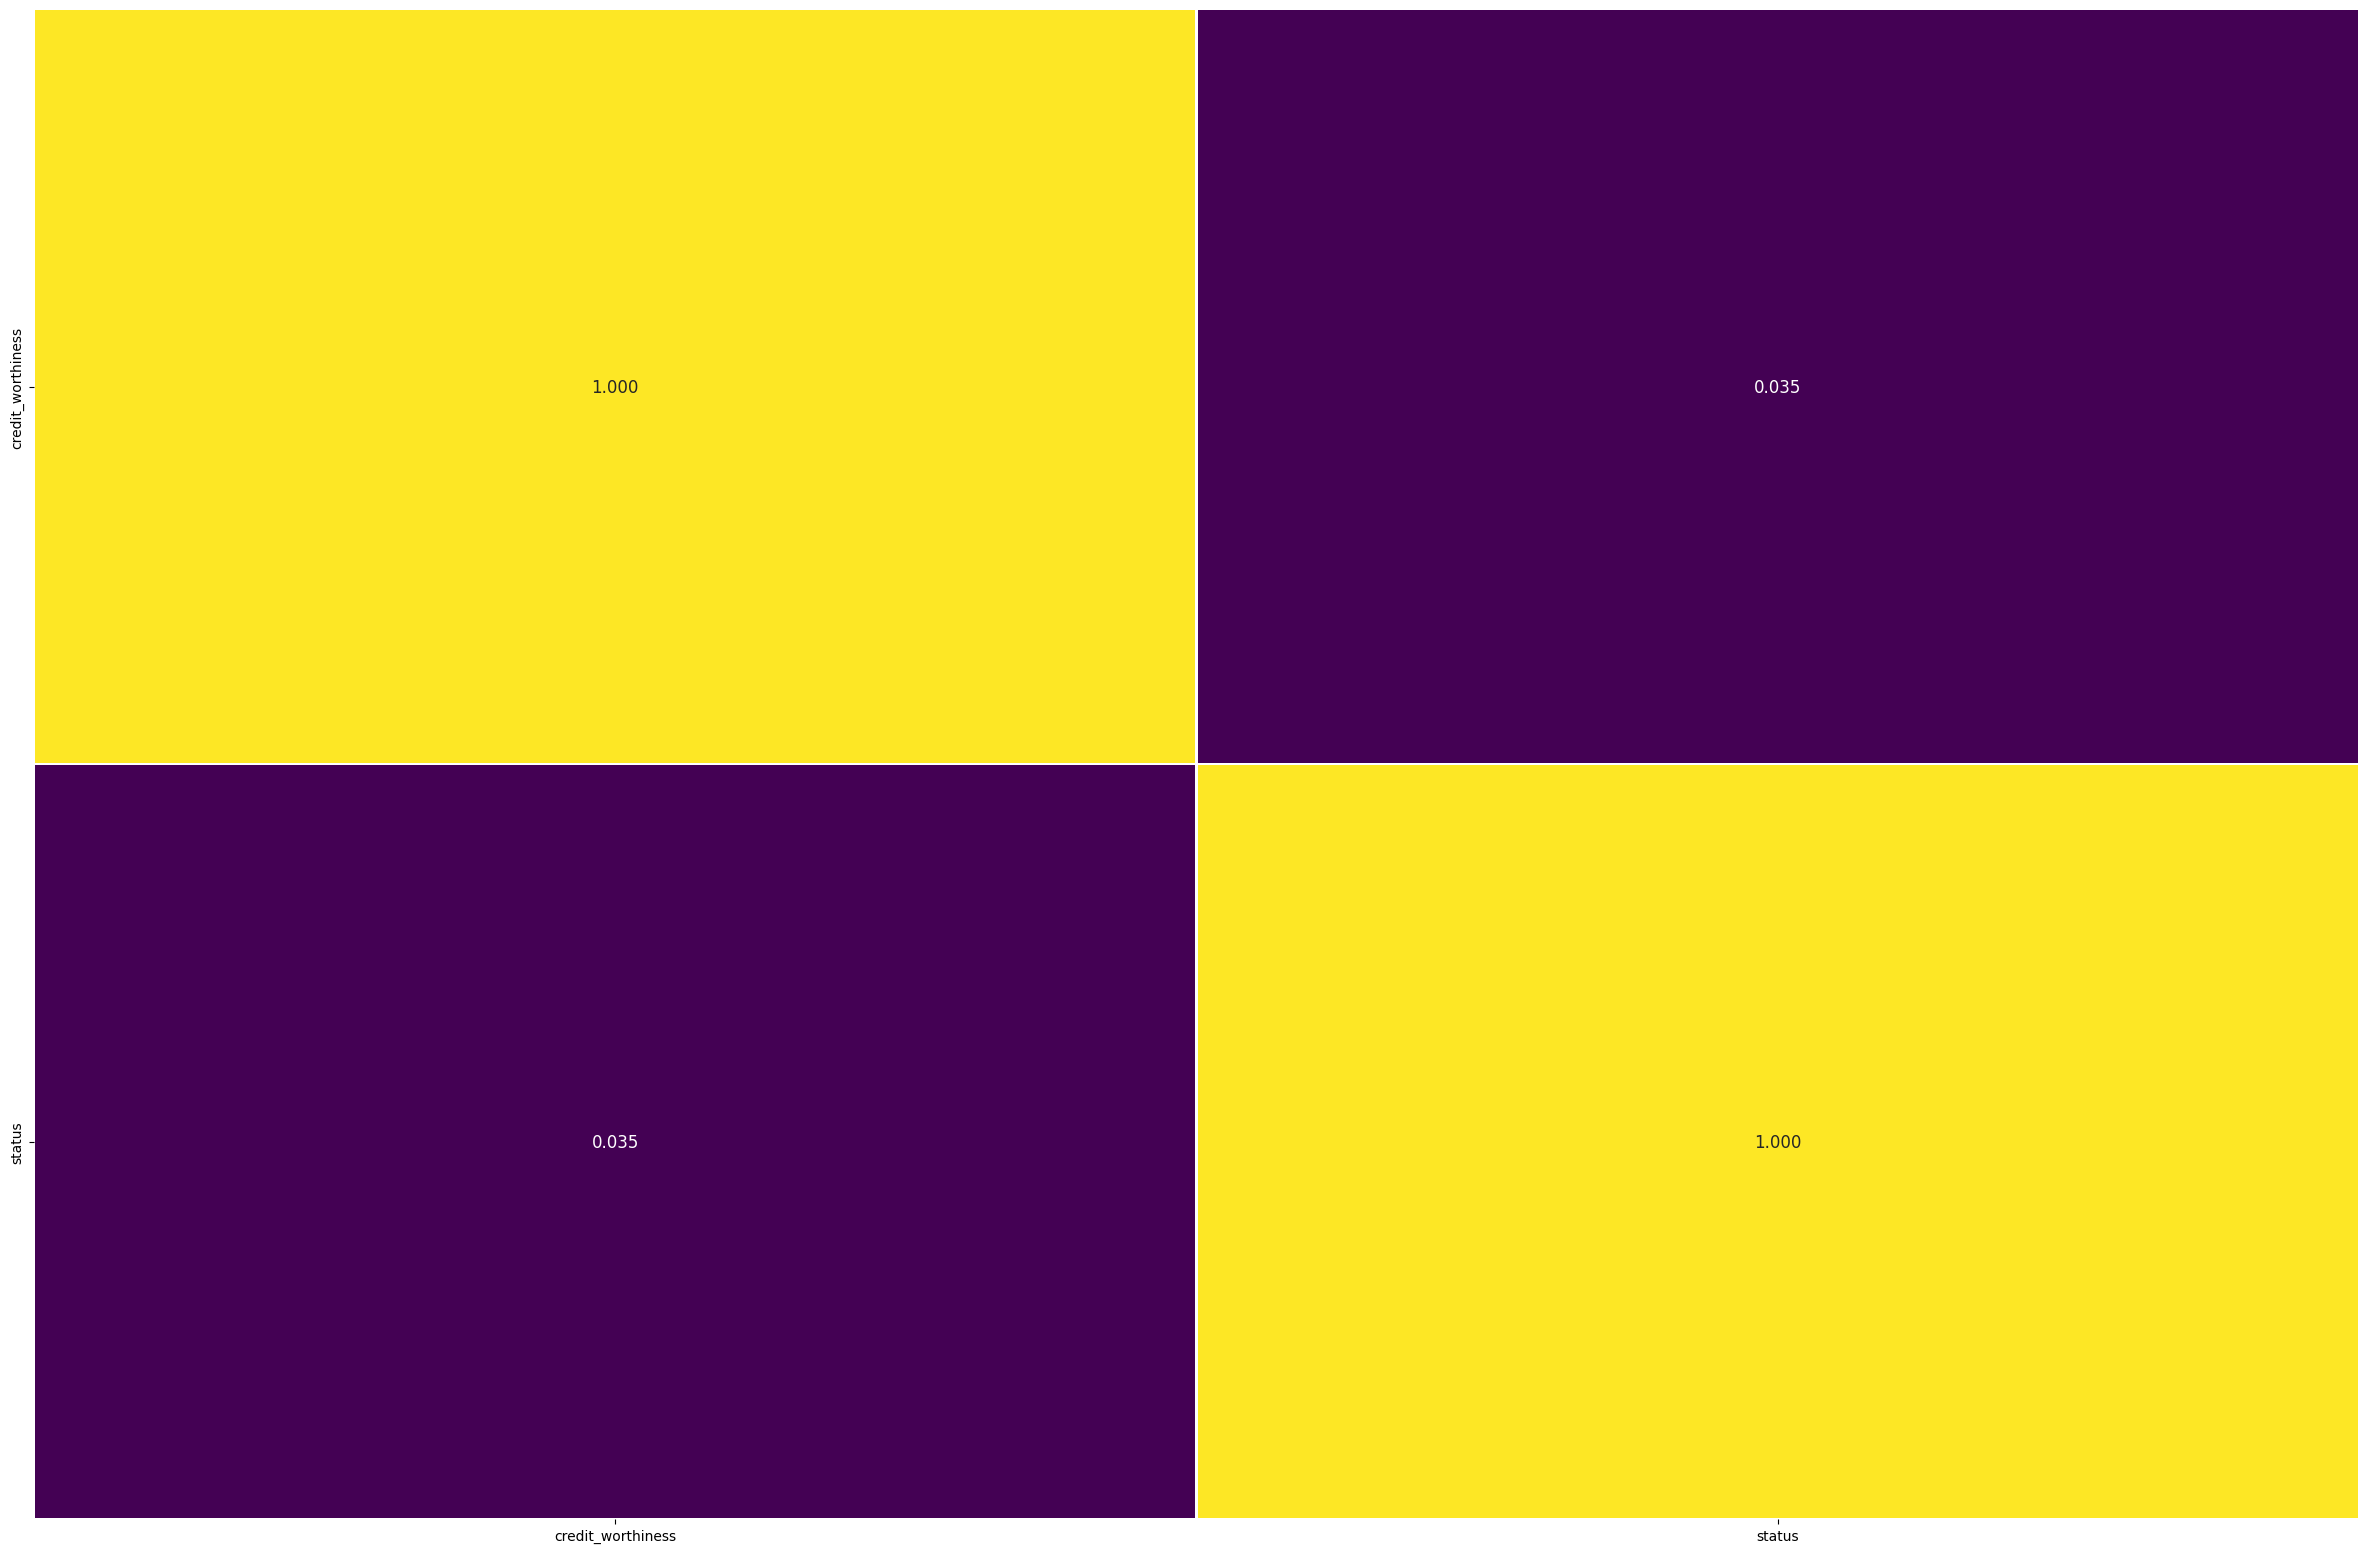

In [ ]:
plt.figure(figsize=(30, 20), dpi=100) 
_ = sns.heatmap(credit_worthiness_df.corr(), annot=True, annot_kws={"fontsize":12}, linecolor='white', \
            linewidth=1, fmt='.3f', cmap="viridis", cbar=False)

There doesn't appear to be a strong correlation between the credit worthiness field and the independent variable. Drop the credit worthiness column.

In [ ]:
dataset.drop(columns=['credit_worthiness'], inplace=True)

#### Line of Credit

Rename 'open_credit' to 'line_of_credit'

In [ ]:
dataset.rename(columns={'open_credit': 'line_of_credit'}, inplace=True)

In [ ]:
dataset['line_of_credit'].unique()

array(['nopc', 'opc'], dtype=object)

Map nopc to 0 and opc to 1...cast to int64

In [ ]:
dataset['line_of_credit'].replace({'nopc': 0, 'opc': 1}, inplace=True)

#### Commercial loan

Rename business_or_commercial to commercial_loan

In [ ]:
dataset.rename(columns={'business_or_commercial': 'commercial_loan'}, inplace=True)

In [ ]:
dataset['commercial_loan'].unique()

array(['nob/c', 'b/c'], dtype=object)

Convert nob/c to 0 and b/c to 1

In [ ]:
dataset['commercial_loan'].replace({'nob/c': 0, 'b/c': 1}, inplace=True)

#### Loan amount

In [ ]:
dataset['loan_amount'].unique()

array([ 116500,  206500,  406500,  456500,  696500,  706500,  346500,
        266500,  376500,  436500,  136500,  466500,  226500,   76500,
        356500,  156500,  586500,  306500,  316500,  336500,  426500,
        476500,  196500,  186500,  246500,  216500,  506500,  656500,
        256500,  396500,  166500,  236500,  866500,  416500,  386500,
        596500,  606500,   86500,  286500,  146500,  446500,  636500,
        486500,  326500,   56500,  906500,  496500,  106500,  126500,
        296500,  176500, 1376500,  566500,  686500,  556500,  676500,
        366500,  276500,  716500,   66500,  616500,   96500,  826500,
         26500,  666500,  546500,  986500,  526500, 1226500,  726500,
       1486500, 1416500,  536500,  796500,  516500,   46500,  876500,
        576500,  626500, 1506500,  886500,  816500,  646500,  776500,
        746500,  736500,  896500,  836500,  806500, 1386500,  976500,
        926500,  786500,  766500, 1176500, 2006500,  756500, 1136500,
        966500, 1356

In [ ]:
dataset['loan_amount'].isna().sum()

0

#### Interest rate

In [ ]:
dataset['rate_of_interest'].unique()

array([  nan, 4.56 , 4.25 , 4.   , 3.99 , 4.5  , 4.125, 4.875, 3.49 ,
       4.375, 3.625, 3.175, 2.99 , 4.99 , 5.25 , 3.75 , 3.375, 3.25 ,
       2.75 , 3.875, 3.5  , 4.75 , 3.125, 5.19 , 4.49 , 2.875, 5.125,
       4.625, 3.7  , 5.   , 3.   , 5.375, 4.18 , 3.69 , 5.5  , 3.65 ,
       5.75 , 3.775, 3.56 , 5.625, 6.24 , 4.475, 3.4  , 2.925, 3.925,
       5.74 , 5.875, 3.45 , 4.275, 2.975, 3.725, 2.85 , 3.675, 3.55 ,
       3.93 , 2.375, 3.85 , 3.525, 2.725, 2.5  , 2.6  , 5.99 , 5.49 ,
       8.   , 3.025, 3.8  , 2.775, 3.05 , 3.325, 6.   , 3.825, 3.15 ,
       3.1  , 4.4  , 3.3  , 4.05 , 6.75 , 4.025, 3.475, 2.625, 3.225,
       3.575, 4.175, 3.9  , 2.95 , 3.075, 3.275, 7.   , 3.425, 5.69 ,
       5.3  , 3.2  , 3.6  , 2.65 , 3.35 , 7.75 , 4.225, 2.25 , 3.95 ,
       4.7  , 2.125, 2.8  , 0.   , 4.2  , 3.975, 4.075, 2.675, 7.375,
       4.44 , 4.865, 4.15 , 6.125, 4.1  , 6.375, 6.5  , 4.35 , 4.3  ,
       6.25 , 2.475, 4.425, 4.525, 7.5  , 4.55 , 4.95 , 4.82 , 6.875,
       4.325, 2.575,

In [ ]:
dataset[~dataset['rate_of_interest'].isna()].shape[0] - dataset[dataset['rate_of_interest'].isna()].shape[0]

75792

75,792 rows are missing an interest rate. This is too many to drop and the interest rate cannot be 0. Explore options for imputing the interest rate.

In [ ]:
print(dataset[(~dataset['rate_of_interest'].isna()) & (dataset['status'] == 0)][['rate_of_interest']].describe())
print(dataset[(~dataset['rate_of_interest'].isna()) & (dataset['status'] == 1)][['rate_of_interest']].describe())

       rate_of_interest
count     112031.000000
mean           4.044931
std            0.561356
min            0.000000
25%            3.625000
50%            3.990000
75%            4.375000
max            8.000000
       rate_of_interest
count        200.000000
mean           4.350500
std            0.495546
min            3.125000
25%            3.990000
50%            4.312500
75%            4.750000
max            5.500000


Interest rate is continous so replace with the median values of each status

In [ ]:
status0_median = dataset[(dataset['status'] == 0) & (~dataset['rate_of_interest'].isna())]['rate_of_interest'].median()

dataset.loc[(dataset['status'] == 0) & (dataset['rate_of_interest'].isna()), 'rate_of_interest'] = status0_median

In [ ]:
status1_median = dataset[(dataset['status'] == 1) & (~dataset['rate_of_interest'].isna())]['rate_of_interest'].median()

dataset.loc[(dataset['status'] == 1) & (dataset['rate_of_interest'].isna()), 'rate_of_interest'] = status1_median

In [ ]:
dataset['rate_of_interest'].isna().sum()

0

In [ ]:
dataset['rate_of_interest'].unique()

array([4.3125, 4.56  , 4.25  , 4.    , 3.99  , 4.5   , 4.125 , 4.875 ,
       3.49  , 4.375 , 3.625 , 3.175 , 2.99  , 4.99  , 5.25  , 3.75  ,
       3.375 , 3.25  , 2.75  , 3.875 , 3.5   , 4.75  , 3.125 , 5.19  ,
       4.49  , 2.875 , 5.125 , 4.625 , 3.7   , 5.    , 3.    , 5.375 ,
       4.18  , 3.69  , 5.5   , 3.65  , 5.75  , 3.775 , 3.56  , 5.625 ,
       6.24  , 4.475 , 3.4   , 2.925 , 3.925 , 5.74  , 5.875 , 3.45  ,
       4.275 , 2.975 , 3.725 , 2.85  , 3.675 , 3.55  , 3.93  , 2.375 ,
       3.85  , 3.525 , 2.725 , 2.5   , 2.6   , 5.99  , 5.49  , 8.    ,
       3.025 , 3.8   , 2.775 , 3.05  , 3.325 , 6.    , 3.825 , 3.15  ,
       3.1   , 4.4   , 3.3   , 4.05  , 6.75  , 4.025 , 3.475 , 2.625 ,
       3.225 , 3.575 , 4.175 , 3.9   , 2.95  , 3.075 , 3.275 , 7.    ,
       3.425 , 5.69  , 5.3   , 3.2   , 3.6   , 2.65  , 3.35  , 7.75  ,
       4.225 , 2.25  , 3.95  , 4.7   , 2.125 , 2.8   , 0.    , 4.2   ,
       3.975 , 4.075 , 2.675 , 7.375 , 4.44  , 4.865 , 4.15  , 6.125 ,
      

Rename rate_of_interest to interest_rate

In [ ]:
dataset.rename(columns={'rate_of_interest': 'interest_rate'}, inplace=True)

#### Interest rate spread

Impute NaNs to 0.0

In [ ]:
dataset['interest_rate_spread'].fillna(0.0, inplace=True)

#### Upfront charges

In [ ]:
dataset['upfront_charges'].unique()

array([    nan,  595.  ,    0.  , ..., 3113.06, 1226.64, 4323.33])

Impute NaNs to 0.0

In [ ]:
dataset['upfront_charges'].fillna(0.0, inplace=True)

In [ ]:
dataset['upfront_charges'].unique()

array([   0.  ,  595.  ,  370.  , ..., 3113.06, 1226.64, 4323.33])

#### Term

In [ ]:
dataset['term'].unique()

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276.,  nan, 132., 216., 168., 204.,
       264., 252., 165., 280., 322.])

Imput NaNs to 0. Conver to int64

In [ ]:
dataset['term'] = dataset['term'].fillna(0).astype(np.int64)

In [ ]:
dataset['term'].unique()

array([360, 300, 180, 312, 144, 240, 348, 324, 120,  96, 192, 156, 228,
       336, 288, 108, 276,   0, 132, 216, 168, 204, 264, 252, 165, 280,
       322])

#### Negative ammortization

In [ ]:
dataset['neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

Imput NaNs to 0s, convert not_neg to 0 and neg_amm to 1. Rename column to negative_ammortization

In [ ]:
dataset['neg_ammortization'].fillna(0, inplace=True)

In [ ]:
dataset['neg_ammortization'].replace({'not_neg': 0, 'neg_amm': 1}, inplace=True)

In [ ]:
dataset.rename(columns={'neg_ammortization': 'negative_ammortization'}, inplace=True)

In [ ]:
dataset['negative_ammortization'].unique()

array([0, 1])

#### Interest only

In [ ]:
dataset['interest_only'].unique()

array(['not_int', 'int_only'], dtype=object)

Convert not_int to 0, int_only to 1

In [ ]:
dataset['interest_only'].replace({'not_int': 0, 'int_only': 1}, inplace=True)

In [ ]:
dataset['interest_only'].unique()

array([0, 1])

#### Lump sum payment

In [ ]:
dataset['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

Convert not_lpsm to 0, lpsm to 1

In [ ]:
dataset['lump_sum_payment'].replace({'not_lpsm': 0, 'lpsm': 1}, inplace=True)

In [ ]:
dataset['lump_sum_payment'].unique()

array([0, 1])

#### Property value

In [ ]:
dataset['property_value'].isna().sum()

15098

Impute NaNs to 0.0

In [ ]:
dataset['property_value'].fillna(0.0, inplace=True)

In [ ]:
dataset['property_value'].isna().sum()

0

#### Construction type

In [ ]:
dataset['construction_type'].unique()

array(['sb', 'mh'], dtype=object)

Convert single borrower to 1, multi-home to 2...impute NaNs to 0

In [ ]:
dataset['construction_type'].fillna(0, inplace=True)

In [ ]:
dataset['construction_type'].replace({'sb': 1, 'mh': 2}, inplace=True)

In [ ]:
dataset['construction_type'].unique()

array([1, 2])

#### Occupancy type

In [ ]:
dataset['occupancy_type'].unique()

array(['pr', 'sr', 'ir'], dtype=object)

Convert primary residence (pr) to 1, secondary residence (sr) to 2, investment property (ir) to 3...impute NaNs to 0

In [ ]:
dataset['occupancy_type'].fillna(0, inplace=True)

In [ ]:
dataset['occupancy_type'].replace({'pr': 1, 'sr': 2, 'ir': 3}, inplace=True)

In [ ]:
dataset['occupancy_type'].unique()

array([1, 2, 3])

#### Property type

Rename secured_by to property_type

In [ ]:
dataset.rename(columns={'secured_by': 'property_type'}, inplace=True)

In [ ]:
dataset['property_type'].unique()

array(['home', 'land'], dtype=object)

Convert home to 1, land to 2...impute NaNs to 0

In [ ]:
dataset['property_type'].replace({'home': 1, 'land': 2}, inplace=True)

In [ ]:
dataset['property_type'].fillna(0, inplace=True)

In [ ]:
dataset['property_type'].unique()

array([1, 2])

#### Units

Rename total_units to units

In [ ]:
dataset.rename(columns={'total_units': 'units'}, inplace=True)

In [ ]:
dataset['units'].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

In [ ]:
dataset['units'].fillna('0', inplace=True)

Remove the 'U' suffix, convert to int64...impute NaNs to 0

In [ ]:
dataset['units'] = dataset['units'].str.replace('U', '').astype(np.int64)

In [ ]:
dataset['units'].unique()

array([1, 2, 3, 4])

#### Income

In [ ]:
dataset['income'].isna().sum()

9150

Impute NaNs to 0.0

In [ ]:
dataset['income'].fillna(0.0, inplace=True)

In [ ]:
dataset['income'].isna().sum()

0

#### Credit type

In [ ]:
dataset['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

Convert EXP to 1, EQUI to 2, TRANS to 3, CRIF and CIB to 4...impute NaNs to 0

In [ ]:
dataset['credit_type'].replace({'EXP': 1, 'EQUI': 2, 'TRANS': 3, 'CIB': 4, 'CRIF': 4}, inplace=True)

In [ ]:
dataset['credit_type'].fillna(0, inplace=True)

In [ ]:
dataset['credit_type'].unique()

array([1, 2, 4])

#### Credit score

In [ ]:
dataset['credit_score'].unique()

array([758, 552, 834, 587, 602, 864, 860, 863, 580, 788, 723, 501, 884,
       520, 773, 685, 846, 534, 629, 688, 668, 692, 620, 533, 518, 812,
       647, 683, 705, 701, 591, 889, 651, 716, 780, 799, 766, 868, 765,
       673, 876, 886, 772, 640, 798, 858, 543, 555, 603, 808, 519, 786,
       769, 556, 567, 632, 818, 584, 750, 838, 741, 820, 665, 783, 663,
       612, 739, 571, 870, 793, 804, 801, 711, 634, 764, 865, 593, 511,
       677, 774, 638, 644, 732, 586, 642, 872, 898, 734, 639, 506, 664,
       670, 577, 857, 653, 595, 787, 560, 613, 514, 867, 717, 619, 600,
       524, 883, 503, 887, 604, 648, 797, 806, 845, 815, 585, 729, 538,
       791, 671, 572, 755, 760, 578, 836, 900, 777, 667, 880, 568, 805,
       590, 892, 540, 869, 737, 831, 608, 803, 795, 674, 781, 545, 796,
       660, 850, 851, 794, 866, 611, 621, 862, 829, 848, 775, 733, 700,
       633, 702, 882, 686, 652, 844, 649, 557, 761, 569, 523, 740, 690,
       616, 782, 601, 809, 855, 768, 627, 854, 762, 746, 592, 70

In [ ]:
dataset['credit_score'].fillna(0, inplace=True)

In [ ]:
dataset['credit_score'].unique()

array([758, 552, 834, 587, 602, 864, 860, 863, 580, 788, 723, 501, 884,
       520, 773, 685, 846, 534, 629, 688, 668, 692, 620, 533, 518, 812,
       647, 683, 705, 701, 591, 889, 651, 716, 780, 799, 766, 868, 765,
       673, 876, 886, 772, 640, 798, 858, 543, 555, 603, 808, 519, 786,
       769, 556, 567, 632, 818, 584, 750, 838, 741, 820, 665, 783, 663,
       612, 739, 571, 870, 793, 804, 801, 711, 634, 764, 865, 593, 511,
       677, 774, 638, 644, 732, 586, 642, 872, 898, 734, 639, 506, 664,
       670, 577, 857, 653, 595, 787, 560, 613, 514, 867, 717, 619, 600,
       524, 883, 503, 887, 604, 648, 797, 806, 845, 815, 585, 729, 538,
       791, 671, 572, 755, 760, 578, 836, 900, 777, 667, 880, 568, 805,
       590, 892, 540, 869, 737, 831, 608, 803, 795, 674, 781, 545, 796,
       660, 850, 851, 794, 866, 611, 621, 862, 829, 848, 775, 733, 700,
       633, 702, 882, 686, 652, 844, 649, 557, 761, 569, 523, 740, 690,
       616, 782, 601, 809, 855, 768, 627, 854, 762, 746, 592, 70

#### CoBorrower credit type

In [ ]:
dataset['co-applicant_credit_type'].unique()

array(['CIB', 'EXP'], dtype=object)

Convert EXP to 1, EQUI to 2, TRANS to 3, CRIF and CIB to 4...impute NaNs to 0

In [ ]:
dataset['co-applicant_credit_type'].replace({'EXP': 1, 'EQUI': 2, 'TRANS': 3, 'CIB': 4, 'CRIF': 4}, inplace=True)

In [ ]:
dataset['co-applicant_credit_type'].fillna(0, inplace=True)

Rename co-applicant_credit_type to co_borrower_credit_type

In [ ]:
dataset.rename(columns={'co-applicant_credit_type': 'co_borrower_credit_type'}, inplace=True)

In [ ]:
dataset['co_borrower_credit_type'].unique()

array([4, 1])

#### Application taken

In [ ]:
dataset['submission_of_application'].unique()

array(['to_inst', 'not_inst', nan], dtype=object)

Convert to_inst to 1, not_inst to 2...impute NaNs to 0. Rename column application_taken

In [ ]:
dataset['submission_of_application'].replace({'to_inst': 1, 'not_inst': 2}, inplace=True)

In [ ]:
dataset['submission_of_application'].fillna(0, inplace=True)

In [ ]:
dataset.rename(columns={'submission_of_application': 'application_taken'}, inplace=True)

In [ ]:
dataset['application_taken'].unique()

array([1., 2., 0.])

In [ ]:
dataset['application_taken'] = dataset['application_taken'].astype(np.int64)

In [ ]:
dataset['application_taken'].unique()

array([1, 2, 0])

#### LTV

In [ ]:
dataset['ltv'].unique()

array([ 98.72881356,          nan,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342])

LTV cannot be NaN...explore the mean, median and mode of LTV for each status.

In [ ]:
print(dataset[dataset['status'] == 0][['ltv']].describe())
print(dataset[dataset['status'] == 1][['ltv']].describe())
print(dataset[dataset['status'] == 0][['ltv']].mode())
print(dataset[dataset['status'] == 1][['ltv']].mode())

                 ltv
count  112029.000000
mean       72.064757
std        41.768899
min         2.072943
25%        59.970817
50%        74.504405
75%        85.201149
max      7831.250000
                ltv
count  21543.000000
mean      76.291468
std       28.580217
min        0.967478
25%       64.273172
50%       79.362416
75%       90.948276
max     2956.250000
     ltv
0  81.25
         ltv
0  91.666667


The median between the two subsets is the closest of the three...impute NaN values to the median of each.

In [ ]:
status0_median = dataset[(dataset['status'] == 0) & (~dataset['ltv'].isna())]['ltv'].median()

dataset.loc[(dataset['status'] == 0) & (dataset['ltv'].isna()), 'ltv'] = status0_median

dataset[dataset['status'] == 0]['ltv'].unique()

array([80.01968504, 69.3768997 , 91.88654354, ..., 66.73703257,
       41.49550706, 32.80201342])

In [ ]:
status1_median = dataset[(dataset['status'] == 1) & (~dataset['ltv'].isna())]['ltv'].median()

dataset.loc[(dataset['status'] == 1) & (dataset['ltv'].isna()), 'ltv'] = status1_median

dataset[dataset['status'] == 1]['ltv'].unique()

array([ 98.72881356,  79.36241611,  81.25      , ...,  58.52272727,
        48.4789823 , 151.8145161 ])

In [ ]:
dataset[dataset['status'] == 0]['ltv'].isna().sum()

0

In [ ]:
dataset[dataset['status'] == 1]['ltv'].isna().sum()

0

#### Deposit type

In [ ]:
dataset['security_type'].unique()

array(['direct', 'Indriect'], dtype=object)

Convert direct to 1, indirect to 2...impute NaNs to 0

In [ ]:
dataset['security_type'].fillna(0, inplace=True)

In [ ]:
dataset['security_type'].replace({'direct': 1, 'Indriect': 2}, inplace=True)

In [ ]:
dataset['security_type'] = dataset['security_type'].astype(np.int64)

In [ ]:
dataset['security_type'].unique()

array([1, 2])

Rename security type to deposit type

In [ ]:
dataset.rename(columns={'security_type': 'deposit_type'}, inplace=True)

In [ ]:
dataset['deposit_type'].unique()

array([1, 2])

#### DTI

In [ ]:
dataset['dtir1'].unique()

array([45., nan, 46., 42., 39., 40., 44., 30., 36., 51., 20., 31.,  6.,
       35., 34., 49., 37., 41., 38., 56., 23., 28., 11., 27., 55., 22.,
       24., 52., 33., 26., 47., 60., 25., 32., 10., 15., 53.,  7., 19.,
       48., 59., 57.,  9., 50., 21., 58., 29., 43., 17., 54., 13., 12.,
       16., 61., 18., 14.,  8.,  5.])

DTI cannot be NaN...explore the mean, median and mode of DTI for each status.

In [ ]:
print(dataset[dataset['status'] == 0][['dtir1']].describe())
print(dataset[dataset['status'] == 1][['dtir1']].describe())
print(dataset[dataset['status'] == 0][['dtir1']].mode())
print(dataset[dataset['status'] == 1][['dtir1']].mode())

               dtir1
count  104220.000000
mean       37.369267
std        10.027197
min         5.000000
25%        31.000000
50%        38.000000
75%        44.000000
max        61.000000
              dtir1
count  20329.000000
mean      39.597324
std       12.716828
min        5.000000
25%       32.000000
50%       42.000000
75%       49.000000
max       61.000000
   dtir1
0   37.0
   dtir1
0   49.0


The mean has the smallest deviation between the two sets...impute NaNs to the mean for each status set

In [ ]:
status0_mean = dataset[(dataset['status'] == 0) & (~dataset['dtir1'].isna())]['dtir1'].mean()

dataset.loc[(dataset['status'] == 0) & (dataset['dtir1'].isna()), 'dtir1'] = status0_mean

dataset[dataset['status'] == 0]['dtir1'].unique()

array([46.        , 42.        , 39.        , 40.        , 44.        ,
       30.        , 36.        , 37.36926694, 31.        ,  6.        ,
       35.        , 34.        , 49.        , 37.        , 41.        ,
       38.        , 56.        , 23.        , 28.        , 27.        ,
       20.        , 55.        , 22.        , 24.        , 52.        ,
       33.        , 26.        , 47.        , 25.        , 45.        ,
       32.        , 10.        , 60.        , 15.        , 53.        ,
        7.        , 19.        , 48.        ,  9.        , 59.        ,
       21.        , 58.        , 29.        , 43.        , 50.        ,
       54.        , 12.        , 16.        , 51.        , 61.        ,
       17.        , 13.        , 14.        ,  8.        , 18.        ,
        5.        , 57.        , 11.        ])

In [ ]:
status1_mean = dataset[(dataset['status'] == 1) & (~dataset['dtir1'].isna())]['dtir1'].mean()

dataset.loc[(dataset['status'] == 1) & (dataset['dtir1'].isna()), 'dtir1'] = status0_mean

dataset[dataset['status'] == 1]['dtir1'].unique()

array([45.        , 37.36926694, 44.        , 51.        , 20.        ,
       42.        , 38.        , 31.        , 11.        , 36.        ,
       49.        , 60.        , 41.        , 56.        , 10.        ,
       59.        , 57.        , 50.        , 19.        , 37.        ,
       35.        ,  6.        , 17.        , 40.        , 47.        ,
       43.        , 27.        , 48.        , 13.        , 24.        ,
       30.        , 39.        , 23.        , 54.        , 52.        ,
       55.        , 46.        , 61.        , 26.        , 18.        ,
       53.        , 21.        , 34.        , 28.        , 16.        ,
       32.        , 58.        , 15.        , 25.        , 12.        ,
       22.        , 14.        , 33.        ,  8.        , 29.        ,
        9.        ,  5.        ,  7.        ])

In [ ]:
print(dataset[dataset['status'] == 0]['dtir1'].isna().sum())
print(dataset[dataset['status'] == 1]['dtir1'].isna().sum())

0
0


Rename dtir1 to dti

In [ ]:
dataset.rename(columns={'dtir1': 'dti'}, inplace=True)

In [ ]:
dataset['dti']

0         45.000000
1         37.369267
2         46.000000
3         42.000000
4         39.000000
            ...    
148665    48.000000
148666    15.000000
148667    49.000000
148668    29.000000
148669    44.000000
Name: dti, Length: 148670, dtype: float64

#### Status

In [ ]:
dataset['status'].unique()

array([1, 0])

This is the column the test split will predict. If any rows were missing a value here they would need to be dropped, however every row has either a 0 or a 1.

In [ ]:
dataset.columns

Index(['loan_limit', 'gender', 'pre_approval', 'loan_type', 'loan_purpose',
       'line_of_credit', 'commercial_loan', 'loan_amount', 'interest_rate',
       'interest_rate_spread', 'upfront_charges', 'term',
       'negative_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type',
       'property_type', 'units', 'income', 'credit_type', 'credit_score',
       'co_borrower_credit_type', 'age', 'application_taken', 'ltv', 'region',
       'deposit_type', 'status', 'dti'],
      dtype='object')

#### Fair credit

Credit cannot be determined on the basis of sex, or age. Remove these columns to avoid violating fair credit reporting laws.

In [ ]:
dataset.columns

Index(['loan_limit', 'gender', 'pre_approval', 'loan_type', 'loan_purpose',
       'line_of_credit', 'commercial_loan', 'loan_amount', 'interest_rate',
       'interest_rate_spread', 'upfront_charges', 'term',
       'negative_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type',
       'property_type', 'units', 'income', 'credit_type', 'credit_score',
       'co_borrower_credit_type', 'age', 'application_taken', 'ltv', 'region',
       'deposit_type', 'status', 'dti'],
      dtype='object')

In [ ]:
dataset.drop(['gender', 'age'], axis=1, inplace=True)

In [ ]:
dataset.columns

Index(['loan_limit', 'pre_approval', 'loan_type', 'loan_purpose',
       'line_of_credit', 'commercial_loan', 'loan_amount', 'interest_rate',
       'interest_rate_spread', 'upfront_charges', 'term',
       'negative_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type',
       'property_type', 'units', 'income', 'credit_type', 'credit_score',
       'co_borrower_credit_type', 'application_taken', 'ltv', 'region',
       'deposit_type', 'status', 'dti'],
      dtype='object')

The region column should only be used for reporting and stress testing a portfolio to reduce disparate impact / treatment. Remove that column to avoid bias in underwriting decisions.

In [ ]:
dataset.drop(['region'], axis=1, inplace=True)

In [ ]:
dataset.to_csv('etl_data.csv', index=False)

#### Build Model

In [ ]:
# Load etl_data

dataset = pd.read_csv('etl_data.csv')

dataset.head()

,loan_limit,pre_approval,loan_type,loan_purpose,line_of_credit,commercial_loan,loan_amount,interest_rate,interest_rate_spread,upfront_charges,...,units,income,credit_type,credit_score,co_borrower_credit_type,application_taken,ltv,deposit_type,status,dti
0,1,0,1,1,0,0,116500,4.3125,0.0000,0.0,...,1,1740.0,1,758,4,1,98.728814,1,1,45.000000
1,1,0,2,1,0,1,206500,4.3125,0.0000,0.0,...,1,4980.0,2,552,1,1,79.362416,1,1,37.369267
2,1,1,1,1,0,0,406500,4.5600,0.2000,595.0,...,1,9480.0,1,834,4,1,80.019685,1,0,46.000000
3,1,0,1,4,0,0,456500,4.2500,0.6810,0.0,...,1,11880.0,1,587,4,2,69.376900,1,0,42.000000
4,1,1,1,1,0,0,696500,4.0000,0.3042,0.0,...,1,10440.0,4,602,1,2,91.886544,1,0,39.000000


In [ ]:
y = dataset["status"].copy()
X = dataset.drop(["status", ], axis=1, inplace=False).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [ ]:
# batch size
max_iter = 10000

classifier = MLPClassifier(
    hidden_layer_sizes = (20, 20), # number of neurons in the perceptron
    early_stopping = True, # after n_iter_no_change epochs stop fitting
    n_iter_no_change = 50, # number of epochs to stop after
    max_iter = max_iter # total number of epochs
)

print (classifier.fit(X_train.to_numpy(), y_train.to_numpy()))

print (f"iterations ran: {classifier.n_iter_}")
print (f"Train score: {classifier.score(X_train.to_numpy(), y_train.to_numpy())}")
print (f"Test score: {classifier.score(X_test.to_numpy(), y_test.to_numpy())}")

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20), max_iter=10000,
              n_iter_no_change=50)
iterations ran: 180
Train score: 0.9153542361317972
Test score: 0.9156072733795206


#### Improve Model

In [ ]:
parameters = {
    'hidden_layer_sizes': [(20, 20), (25, 25)],
    'learning_rate_init': [.001, .003, .004],
    'tol': [1e-05, 5e-05, 1e-04],
}

cv = GridSearchCV(classifier, param_grid=parameters, cv=3, verbose=5, n_jobs=-1, return_train_score=True)

print(cv.fit(X_train.to_numpy(), y_train.to_numpy()))
print (f"recommended estimator: {cv.best_estimator_}")
print (f"recommended parameters: {cv.best_params_}")
print (f"best score: {cv.best_score_}")

classifier_improved = cv.best_estimator_

print (f"Train score: {classifier_improved.score(X_train.to_numpy(), y_train.to_numpy())}")
print (f"Test score: {classifier_improved.score(X_test.to_numpy(), y_test.to_numpy())}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True,
                                     hidden_layer_sizes=(20, 20),
                                     max_iter=10000, n_iter_no_change=50),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(20, 20), (25, 25)],
                         'learning_rate_init': [0.001, 0.003, 0.004],
                         'tol': [1e-05, 5e-05, 0.0001]},
             return_train_score=True, verbose=5)
recommended estimator: MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20), max_iter=10000,
              n_iter_no_change=50, tol=5e-05)
recommended parameters: {'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.001, 'tol': 5e-05}
best score: 0.9066964800430709
Train score: 0.9043230933323084
Test score: 0.9022443442972131


#### Evaluate Model

In [ ]:
y_pred = cv.predict(X_test.to_numpy())

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     33702
           1       0.81      0.78      0.80     10899

    accuracy                           0.90     44601
   macro avg       0.87      0.86      0.87     44601
weighted avg       0.90      0.90      0.90     44601

